In [2]:
from vnstock import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [4]:
stock = stock_historical_data(symbol="FPT", type="stock", start_date="2018-12-25", end_date="2020-12-24")

In [5]:
# Convert the "time" column to datetime
stock['time'] = pd.to_datetime(stock['time'])

In [6]:
stock.head(5)

,time,open,high,low,close,volume,ticker
0,2018-12-25,17880,17930,17710,17930,732310,FPT
1,2018-12-26,17930,18080,17880,17880,333590,FPT
2,2018-12-27,18180,18250,18060,18060,454860,FPT
3,2018-12-28,18170,18240,18060,18240,387170,FPT
4,2019-01-02,18060,18210,17780,17800,459120,FPT


In [7]:
data = stock

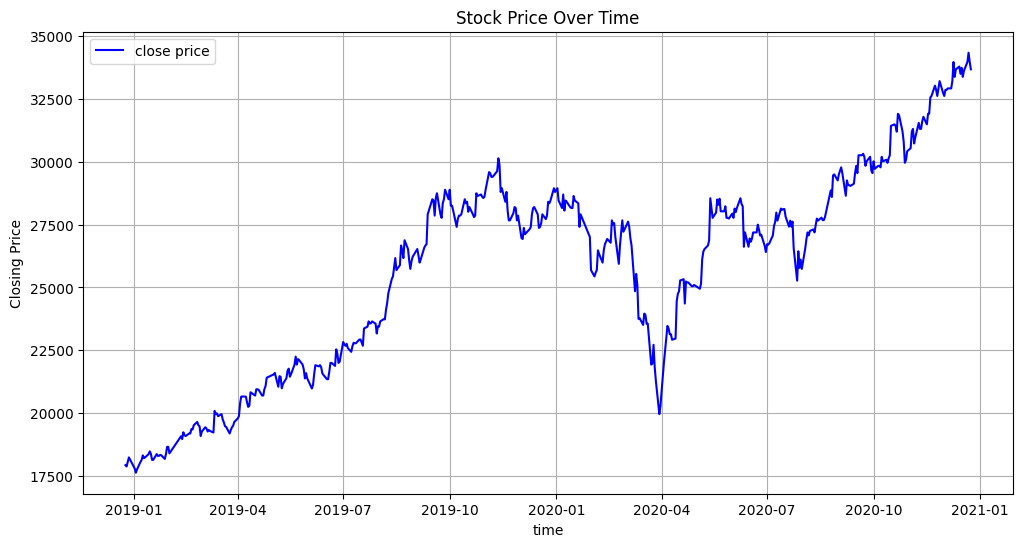

In [8]:
# Create a time series plot of the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['close'], label='close price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Define the split point based on the index
split_index = int(0.7 * len(data))

# Split the data
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Verify the lengths of the splits
print("Training data length:", len(train_data))
print("Test data length:", len(test_data))

Training data length: 350
Test data length: 151


In [11]:
# Selecting Open Price values
dataset_train = train_data['close'].values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(350, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[[0.02398082]
 [0.01998401]
 [0.0343725 ]
 [0.04876099]
 [0.01358913]]


In [13]:
# Selecting Open Price values
dataset_test = test_data['close'].values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(scaled_test[:5])


[[0.27563396]
 [0.27563396]
 [0.27232635]
 [0.29437707]
 [0.27563396]]


In [14]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()


[array([0.02398082, 0.01998401, 0.0343725 , 0.04876099, 0.01358913,
       0.        , 0.01039169, 0.0343725 , 0.04076739, 0.05515588,
       0.04636291, 0.04876099, 0.05915268, 0.06794564, 0.05995204,
       0.04076739, 0.04076739, 0.05915268, 0.05355715, 0.05355715,
       0.0567546 , 0.05515588, 0.04396483, 0.05915268, 0.08233413,
       0.08233413, 0.06155076, 0.11590727, 0.10711431, 0.12869704,
       0.11910472, 0.11670663, 0.12470024, 0.12470024, 0.13908873,
       0.13749001, 0.15107914, 0.16147082, 0.15107914, 0.14788169,
       0.11670663, 0.13109512, 0.14468425, 0.14068745, 0.13109512,
       0.13589129, 0.13269384, 0.12789768, 0.19664269, 0.186251  ])]
[0.18864908073541176]

[array([0.02398082, 0.01998401, 0.0343725 , 0.04876099, 0.01358913,
       0.        , 0.01039169, 0.0343725 , 0.04076739, 0.05515588,
       0.04636291, 0.04876099, 0.05915268, 0.06794564, 0.05995204,
       0.04076739, 0.04076739, 0.05915268, 0.05355715, 0.05355715,
       0.0567546 , 0.05515588, 0.04

In [15]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])
	if i <= 51:
		print(X_train)
		print(y_train)
		print()

[array([0.02398082, 0.01998401, 0.0343725 , 0.04876099, 0.01358913,
       0.        , 0.01039169, 0.0343725 , 0.04076739, 0.05515588,
       0.04636291, 0.04876099, 0.05915268, 0.06794564, 0.05995204,
       0.04076739, 0.04076739, 0.05915268, 0.05355715, 0.05355715,
       0.0567546 , 0.05515588, 0.04396483, 0.05915268, 0.08233413,
       0.08233413, 0.06155076, 0.11590727, 0.10711431, 0.12869704,
       0.11910472, 0.11670663, 0.12470024, 0.12470024, 0.13908873,
       0.13749001, 0.15107914, 0.16147082, 0.15107914, 0.14788169,
       0.11670663, 0.13109512, 0.14468425, 0.14068745, 0.13109512,
       0.13589129, 0.13269384, 0.12789768, 0.19664269, 0.186251  ]), array([0.01998401, 0.0343725 , 0.04876099, 0.01358913, 0.        ,
       0.01039169, 0.0343725 , 0.04076739, 0.05515588, 0.04636291,
       0.04876099, 0.05915268, 0.06794564, 0.05995204, 0.04076739,
       0.04076739, 0.05915268, 0.05355715, 0.05355715, 0.0567546 ,
       0.05515588, 0.04396483, 0.05915268, 0.08233413, 0.08

In [16]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (300, 50, 1) y_train : (300, 1)


In [17]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (101, 50, 1) y_test : (101, 1)


In [18]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [19]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
                        activation = "relu",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
                        activation = "relu",
                    	return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "relu",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = 'adam', 
                loss = "mean_squared_error", metrics=["mae", "accuracy"])

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
150/150 [==============================] - 5s 17ms/step - loss: 0.0117 - mae: 0.0839 - accuracy: 0.0033
Epoch 2/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0079 - mae: 0.0693 - accuracy: 0.0033
Epoch 3/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0043 - mae: 0.0500 - accuracy: 0.0033
Epoch 4/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0041 - mae: 0.0483 - accuracy: 0.0033
Epoch 5/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0036 - mae: 0.0454 - accuracy: 0.0033
Epoch 6/20
150/150 [==============================] - 3s 17ms/step - loss: 0.0051 - mae: 0.0548 - accuracy: 0.0033
Epoch 7/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0039 - mae: 0.0476 - accuracy: 0.0033
Epoch 8/20
150/150 [==============================] - 2s 16ms/step - loss: 0.0033 - mae: 0.0443 - accuracy: 0.0033
Epoch 9/20
150/150 [==============================] - 2s 16ms/step - loss: 0.003

In [20]:
y_RNN = regressor.predict(X_test)
y_RNN_O = scaler.inverse_transform(y_RNN) 

4/4 [==============================] - 0s 7ms/step


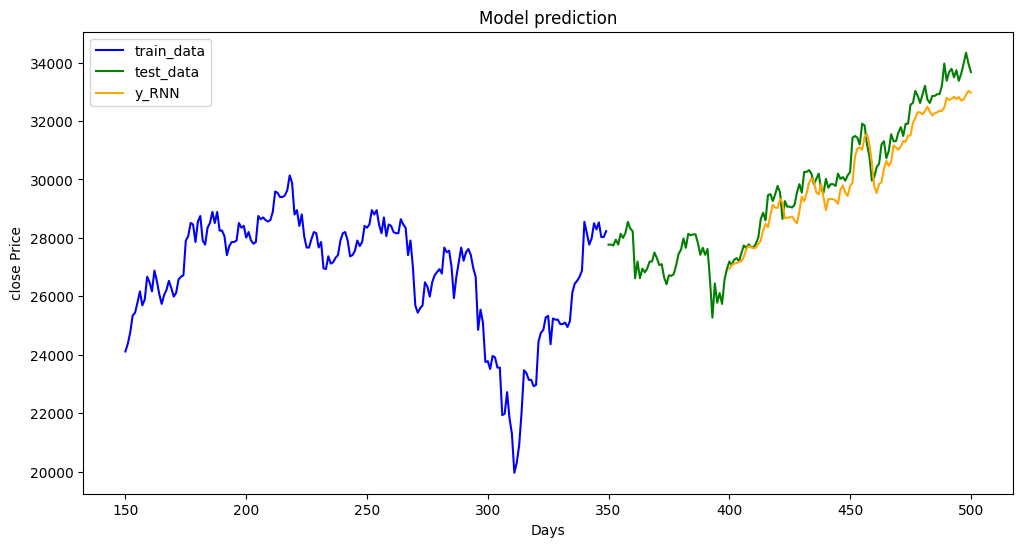

In [21]:
plt.figure(figsize=(12, 6))
plt.title("Model prediction")

#Plot for LSTM predictions
plt.plot(train_data.index[150:], train_data["close"][150:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data["close"], label = "test_data", color = "g")
plt.plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "orange")
plt.legend()

plt.xlabel("Days")
plt.ylabel("close Price")

plt.show()